In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [40]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [41]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [85]:
f = df.to_numpy()
f[0][0].year
akk = np.zeros(9)
for i in range(len(f)):
    akk[ f[i][0].year - 2008 ] += f[i][1]
for i in range(len(akk)):
    if akk[i] % 4 == 0:
        akk[i] /= 366
    else:
        akk[i] /= 365

index_cold_year = np.argmin(akk)
index_cold_year + 2008

2012

**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [86]:
akk = np.zeros(9)
for i in range(len(f)):
    if f[i][0].month == 1 and f[i][1] >= 0:
        akk[ f[i][0].year - 2008 ] += 1

index_januar_most_days = np.argmin(akk)
index_januar_most_days + 2008

2010

**3.** В каком году было самое холодное лето (по средней температуре)

In [87]:
akk = np.zeros(9)
for i in range(len(f)):
    if f[i][0].month == 6 or f[i][0].month == 7 or f[i][0].month == 8:
        akk[ f[i][0].year - 2008 ] += f[i][1]

index_januar_most_days = np.argmin(akk)
index_januar_most_days + 2008

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [88]:
dif = 0
day = f[0][0]
for i in range(len(f)-1):
    vsp = abs(f[i+1][1] - f[i][1])
    if vsp > dif:
        dif = vsp
        day = f[i][0]

day

Timestamp('2014-05-26 00:00:00')

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

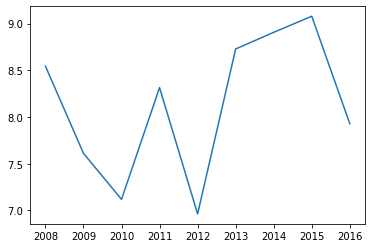

In [89]:
akk = np.zeros(9)
for i in range(len(f)):
    akk[ f[i][0].year - 2008 ] += f[i][1]
for i in range(len(akk)):
    if akk[i] % 4 == 0:
        akk[i] /= 366
    else:
        akk[i] /= 365

x = np.arange(2008,2017)
plt.plot(x,akk)